<h3><strong>Portfolio Project: Implementing and Comparing Linear Classifiers for Breast Cancer Diagnosis</strong></h3>
<p>
  I will implement three fundamental linear classifiers from scratch—<strong>Perceptron</strong>, <strong>Adaline with Batch Gradient Descent</strong>, and <strong>Adaline with Stochastic Gradient Descent</strong>—to predict whether a breast cancer tumor is malignant or benign.
</p>
<p>
  This project re-creates the learning journey of the chapter 2 but applies it to a more compelling, real-world medical dataset. I will not only build the algorithms, but also:
</p>
<ul>
  <li>Analyze their convergence behavior</li>
  <li>Demonstrate the critical need for feature scaling</li>
  <li>Visually compare their final decision boundaries</li>
</ul>

<strong>Setup</strong>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

<strong>Data Loading &amp; Exploration</strong>

In [43]:
df = pd.read_csv("breast_cancer_data.csv")
df = df.dropna(how="all", axis=1)

In [44]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [47]:
df.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [48]:
df.duplicated().any()

np.False_

<strong>Data Preprocessing</strong>

In [49]:
df["diagnosis"] = np.where(df["diagnosis"] == "M", 1, 0)

<Axes: xlabel='perimeter_worst', ylabel='area_worst'>

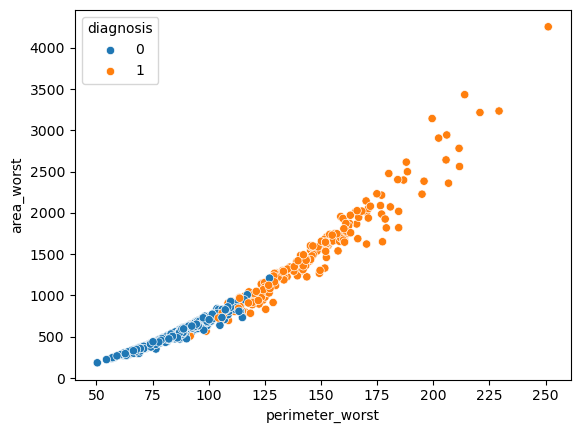

In [50]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

y = df["diagnosis"]
X = df.drop(columns=["diagnosis", "id"])
selector = SelectKBest(mutual_info_classif, k=2)
selector.fit(X, y)

cols_idx = selector.get_support(indices=True)
X_new_topk = X.iloc[:, cols_idx]

sns.scatterplot(
    data=df, x=X_new_topk.columns[0], y=X_new_topk.columns[1], hue="diagnosis"
)

<Axes: xlabel='concave points_worst', ylabel='perimeter_worst'>

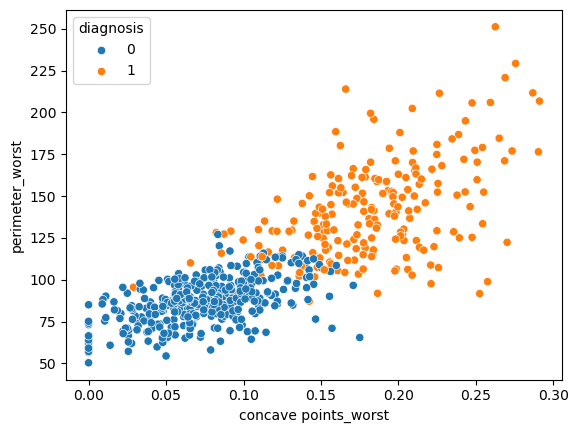

In [51]:
X_new_corr = X[df.corr()["diagnosis"].sort_values(ascending=False).iloc[1:3].index]
sns.scatterplot(
    data=df, x=X_new_corr.columns[0], y=X_new_corr.columns[1], hue="diagnosis"
)

<strong>Part 1: The Perceptron Classifier</strong>

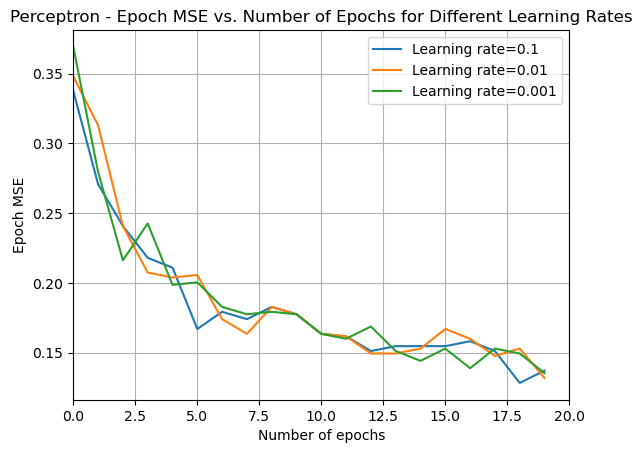

In [52]:
class Perceptron:
    def __init__(self, random_state, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.errors = []

    def fit(self, X, y):
        n_rows = X.shape[0]
        n_cols = X.shape[1]

        self.w = self.rand_gen(length=n_cols)
        self.b = 0.0

        for n in range(self.n_iter):
            iter_error = 0

            for x_i, y_i in zip(X, y):
                current_pred = self.predict(x_i)

                if current_pred != y_i:
                    error = y_i - current_pred
                    update_b = error * self.eta
                    update_w = x_i * update_b
                    self.w += update_w
                    self.b += update_b
                    iter_error += abs(error)

            iter_error = iter_error / n_rows
            self.errors.append(iter_error)

        return self

    def predict(self, X):
        y_pred_raw = np.dot(X, self.w) + self.b
        y_pred = self.threshold(y_pred_raw)
        return y_pred

    def rand_gen(self, length: int):
        rng_w = np.random.default_rng(seed=self.random_state)
        w = rng_w.normal(size=length)
        return w

    def threshold(self, raw_y):
        out = np.where(raw_y >= 0, 1, 0)
        return out


def StandardScaler(X):
    X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return X_scaled


X_scaled = StandardScaler(X=X_new_topk)

plt.grid()
eta_list = [0.1, 0.01, 0.001]

for eta in eta_list:
    PClassifier = Perceptron(eta=eta, n_iter=20, random_state=17)
    PClassifier.fit(X=X_new_topk.values, y=y.values)

    plt.xlim(0, PClassifier.n_iter)
    sns.lineplot(
        x=range(PClassifier.n_iter), y=PClassifier.errors, label=f"Learning rate={eta}"
    )
    plt.title(
        "Perceptron - Epoch MSE vs. Number of Epochs for Different Learning Rates"
    )
    plt.xlabel("Number of epochs")
    plt.ylabel("Epoch MSE")


PClassifier = Perceptron(eta=0.1, n_iter=20, random_state=17)
PClassifier.fit(X=X_scaled.values, y=y.values)

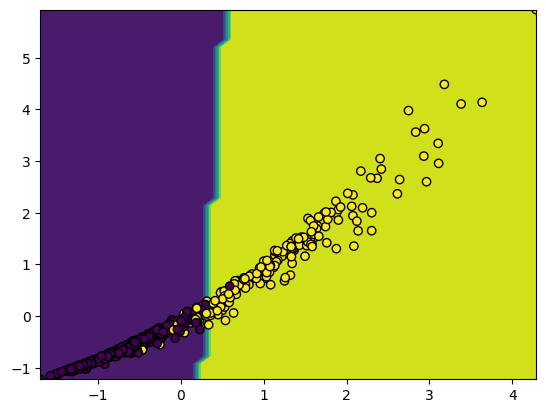

In [53]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X_scaled.values[:, 0].min(), X_scaled.values[:, 0].max()),
    np.linspace(X_scaled.values[:, 1].min(), X_scaled.values[:, 1].max()),
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(PClassifier.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)

display.plot()
display.ax_.scatter(
    X_scaled.values[:, 0], X_scaled.values[:, 1], c=y.values, edgecolor="black"
)

plt.show()

<strong>Part 2: Adaline with Batch Gradient Descent (BGD)</strong>

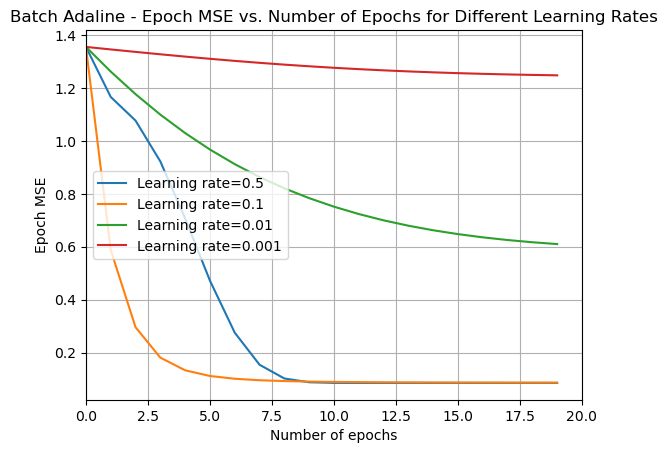

In [54]:
class AdalineGD:
    def __init__(self, random_state, eta, n_iter, decay=None):
        self.eta = eta
        self.random_state = random_state
        self.n_iter = n_iter
        self.decay = decay
        self.errors = []

    def fit(self, X, y):
        n_rows = X.shape[0]
        n_cols = X.shape[1]
        y = np.reshape(y, (-1, 1))
        self.w_ = self.rand(length=n_cols)
        self.b_ = 0.0

        for n in range(self.n_iter):
            input = np.dot(X, self.w_) + self.b_
            activated_input = self.activation(input)
            error = y - activated_input
            update_b = self.eta * 2.0 * np.mean(error)
            update_w = self.eta * 2.0 * ((np.dot(X.T, error)) / n_rows)
            self.w_ += update_w
            self.b_ += update_b
            mse_iter = np.mean(error**2)
            self.errors.append(mse_iter)

            if self.decay:
                self.eta *= self.decay ** (n + 1)

        return self

    def predict(self, X):
        y_pred_raw = np.dot(X, self.w_) + self.b_
        y_pred = np.where(y_pred_raw >= 0.5, 1, 0)
        return y_pred

    def activation(self, X):
        return X

    def rand(self, length: int):
        rnd = np.random.default_rng(seed=self.random_state)
        rand_list = rnd.normal(size=(length, 1))
        return rand_list


plt.grid()

eta_list = [0.5, 0.1, 0.01, 0.001]

for eta in eta_list:
    ADBatch = AdalineGD(eta=eta, n_iter=20, decay=0.99, random_state=17)
    ADBatch.fit(X=X_scaled.values, y=y.values)
    plt.xlim(0, ADBatch.n_iter)
    sns.lineplot(
        x=range(ADBatch.n_iter), y=ADBatch.errors, label=f"Learning rate={eta}"
    )
    plt.title(
        "Batch Adaline - Epoch MSE vs. Number of Epochs for Different Learning Rates"
    )
    plt.xlabel("Number of epochs")
    plt.ylabel("Epoch MSE")

ADBatch = AdalineGD(eta=0.1, n_iter=20, decay=0.99, random_state=17)
ADBatch.fit(X=X_scaled.values, y=y.values)

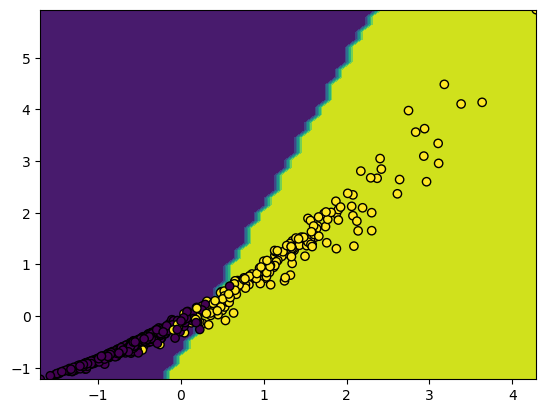

In [55]:
y_pred = np.reshape(ADBatch.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)

display.plot()
display.ax_.scatter(
    X_scaled.values[:, 0], X_scaled.values[:, 1], c=y.values, edgecolor="black"
)

plt.show()

<strong>Part 3: Adaline with Stochastic Gradient Descent (SGD)</strong>

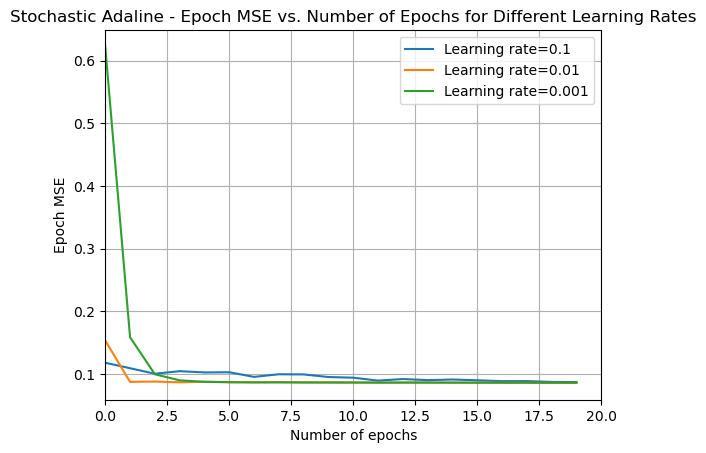

In [56]:
class AdalineSGD:
    def __init__(self, eta, n_iter, random_state, decay=None):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.errors = []
        self.decay = decay

    def fit(self, X, y):
        n_rows = X.shape[0]
        n_cols = X.shape[1]
        self.w_ = self.rand_list(length=n_cols)
        self.b_ = 0.0
        current_seed = self.random_state

        for n in range(self.n_iter):
            iter_errors = []
            X_shuffled, y_shuffled = self.shuffle(X=X, y=y, random_seed=current_seed)

            for i in range(n_rows):
                ini_input = self.input(X_shuffled[i])
                final_input = self.activation(X=ini_input)
                error = y_shuffled[i] - final_input
                b_delta = error * self.eta
                w_delta = X_shuffled[i] * b_delta
                self.w_ += w_delta.reshape(-1, 1)
                self.b_ += b_delta
                iter_errors.append(error**2)

            self.errors.append(np.mean(iter_errors))
            current_seed += 1
            if self.decay:
                self.eta *= self.decay ** (n + 1)

        return self

    def rand_list(self, length: int):
        rnd = np.random.default_rng(seed=self.random_state)
        list = rnd.normal(size=(length, 1))
        return list

    def shuffle(self, X, y, random_seed: int):
        rnd = np.random.default_rng(seed=random_seed)
        idx = rnd.permutation(len(X))
        X_shuffled = X[idx]
        y_shuffled = y[idx]
        return X_shuffled, y_shuffled

    def activation(self, X):
        return X

    def input(self, X):
        ini_input = np.dot(X, self.w_) + self.b_
        return ini_input

    def predict(self, X):
        y_pred_raw = self.input(X=X)
        y_pred = np.where(y_pred_raw >= 0.5, 1, 0)
        return y_pred


plt.grid()
eta_list = [0.1, 0.01, 0.001]

for eta in eta_list:
    ADClassifier_SGD = AdalineSGD(eta=eta, n_iter=20, random_state=17, decay=0.99)
    ADClassifier_SGD.fit(X=X_scaled.values, y=y.values)

    plt.xlim(0, ADClassifier_SGD.n_iter)
    sns.lineplot(
        x=range(ADClassifier_SGD.n_iter),
        y=ADClassifier_SGD.errors,
        label=f"Learning rate={eta}",
    )
    plt.title(
        "Stochastic Adaline - Epoch MSE vs. Number of Epochs for Different Learning Rates"
    )
    plt.xlabel("Number of epochs")
    plt.ylabel("Epoch MSE")

ADClassifier_SGD = AdalineSGD(eta=0.01, n_iter=20, random_state=17, decay=0.99)
ADClassifier_SGD.fit(X=X_scaled.values, y=y.values)

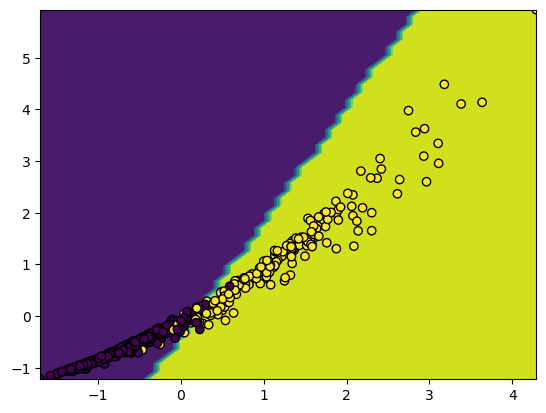

In [57]:
from sklearn.inspection import DecisionBoundaryDisplay

y_pred = np.reshape(ADClassifier_SGD.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=y_pred)

display.plot()
display.ax_.scatter(
    X_scaled.values[:, 0], X_scaled.values[:, 1], c=y.values, edgecolor="black"
)

plt.show()

Text(0.5, 1.0, 'Accuracy scores of Perceptron and Adaline models')

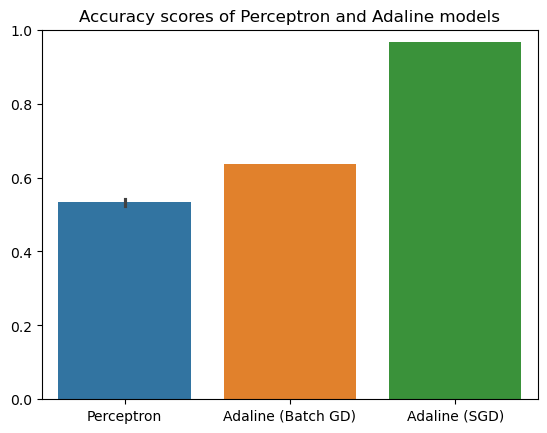

In [ ]:
def accuracy(X, y, model):
    acc = sum(model.predict(X) == y) / len(y)
    return acc


X_full_scaled = StandardScaler(X=X)

pers_new = Perceptron(random_state=17, eta=0.1, n_iter=50)
pers_new.fit(X_full_scaled.values, y.values)

ada_bgd_new = AdalineGD(random_state=17, eta=0.01, n_iter=50)
ada_bgd_new.fit(X_full_scaled.values, y.values)

ada_sgd_new = AdalineSGD(random_state=17, eta=0.01, n_iter=50)
ada_sgd_new.fit(X_full_scaled.values, y.values)

acc_percep = accuracy(X=X_full_scaled.values, y=y.values.reshape(-1, 1), model=pers_new)
acc_ada_batch = accuracy(
    X=X_full_scaled.values, y=y.values.reshape(-1, 1), model=ada_bgd_new
)
acc_ada_sgd = accuracy(
    X=X_full_scaled.values, y=y.values.reshape(-1, 1), model=ada_sgd_new
)

plt.ylim(0.0, 1.0)
sns.barplot(
    {
        "Perceptron": acc_percep,
        "Adaline (Batch GD)": acc_ada_batch,
        "Adaline (SGD)": acc_ada_sgd,
    }
)
plt.title("Accuracy scores of Perceptron and Adaline models")